In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.pandas.set_option("display.max_columns", None)

In [3]:
X_train = pd.read_csv("/Users/bajajn2/Nakul/Projects/deployMachineLearningModels/xtrain.csv")
X_test = pd.read_csv("/Users/bajajn2/Nakul/Projects/deployMachineLearningModels/xtest.csv")

In [4]:
features = pd.read_csv("/Users/bajajn2/Nakul/Projects/deployMachineLearningModels/selected_features.csv")

In [5]:
Y_train = X_train["SalePrice"]
Y_test = X_test["SalePrice"]
X_train = X_train[features["0"].tolist() + ["LotFrontage"]]
X_test = X_test[features["0"].tolist() + ["LotFrontage"]]

In [6]:
seed = 0

In [7]:
model1 = Lasso(alpha=0.005, random_state=seed)
model2 = RandomForestRegressor(n_jobs=-1, random_state=seed)
model3 = SVR()
model4 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5, random_state=seed),random_state=seed)

In [8]:
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=0,
                                                       splitter='best'),
                  lea

In [9]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [10]:
predTrain1 = model1.predict(X_train)
predTrain2 = model2.predict(X_train)
predTrain3 = model3.predict(X_train)
predTrain4 = model4.predict(X_train)

In [11]:
msetrain1 = mean_squared_error(np.exp(Y_train), np.exp(predTrain1))
msetrain2 = mean_squared_error(np.exp(Y_train), np.exp(predTrain2))
msetrain3 = mean_squared_error(np.exp(Y_train), np.exp(predTrain3))
msetrain4 = mean_squared_error(np.exp(Y_train), np.exp(predTrain4))

msetest1 = mean_squared_error(np.exp(Y_test), np.exp(pred1))
msetest2 = mean_squared_error(np.exp(Y_test), np.exp(pred2))
msetest3 = mean_squared_error(np.exp(Y_test), np.exp(pred3))
msetest4 = mean_squared_error(np.exp(Y_test), np.exp(pred4))

In [12]:
print("mse train 1 : {}, 2 : {}, 3 : {}, 4 : {}" .format(msetrain1, msetrain2, msetrain3, msetrain4))

print("mse test 1 : {}, 2 : {}, 3 : {}, 4 : {}" .format(msetest1, msetest2, msetest3, msetest4))

mse train 1 : 1087435415.4414542, 2 : 120400906.0921131, 3 : 410437732.62399906, 4 : 426739024.8623336
mse test 1 : 1405259552.2596064, 2 : 1050422219.0737668, 3 : 1097611994.7717085, 4 : 1090340346.0561981


In [13]:
pred1

array([12.31914338, 11.8791689 , 11.73924683, 12.28273968, 11.59191561,
       11.64730971, 12.38312338, 11.72704579, 12.97982867, 12.07226187,
       12.29102523, 11.93875835, 12.26460074, 11.72557326, 11.79065235,
       11.78656053, 12.38532367, 11.73590427, 11.82672907, 12.10086405,
       11.75944981, 12.09679325, 11.506084  , 12.07881838, 12.13555579,
       12.08238878, 12.11974637, 11.34510086, 12.36966654, 11.68185206,
       11.92524834, 12.17361415, 11.92199436, 12.56906076, 12.58971551,
       12.15532561, 12.5572415 , 11.810279  , 12.39579866, 12.60352132,
       12.16587009, 11.8347687 , 12.27426683, 12.5673996 , 12.64989991,
       11.82629052, 11.67126788, 11.82948395, 11.98427628, 11.58612276,
       12.78420327, 11.80776464, 12.0237708 , 11.46366804, 12.25118057,
       11.71464641, 11.77211838, 12.35859423, 11.73031643, 11.50556067,
       11.9119397 , 11.7282703 , 11.88126967, 11.92626738, 12.14400991,
       12.02462966, 11.75752985, 12.30250435, 12.00661768, 12.31

In [78]:
rmseTrain = np.sqrt(mean_squared_error(np.exp(Y_train), np.exp(predTrain1)))
rmseTest = np.sqrt(mean_squared_error(np.exp(Y_test), np.exp(pred1)))

In [79]:
print("rmse train: {} and test: {}".format(rmseTrain, rmseTest))

rmse train: 32976.28565259366 and test: 37486.79170400698


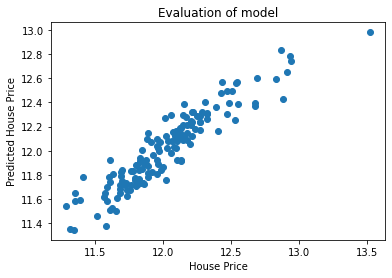

In [80]:
plt.scatter(Y_test, pred1)
plt.title("Evaluation of model")
plt.xlabel("House Price")
plt.ylabel("Predicted House Price")
plt.show()

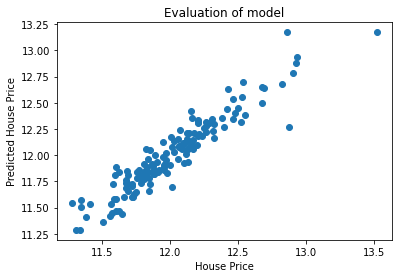

In [81]:
plt.scatter(Y_test, pred2)
plt.title("Evaluation of model")
plt.xlabel("House Price")
plt.ylabel("Predicted House Price")
plt.show()

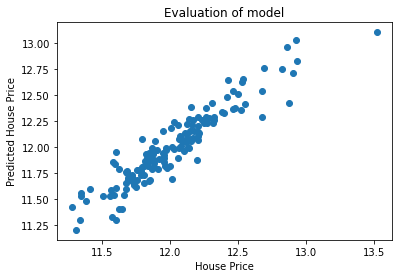

In [82]:
plt.scatter(Y_test, pred3)
plt.title("Evaluation of model")
plt.xlabel("House Price")
plt.ylabel("Predicted House Price")
plt.show()

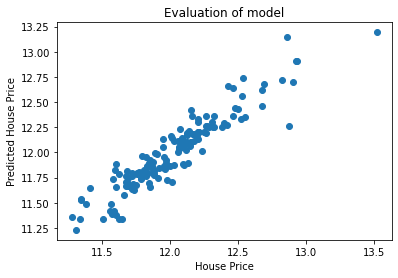

In [83]:
plt.scatter(Y_test, pred4)
plt.title("Evaluation of model")
plt.xlabel("House Price")
plt.ylabel("Predicted House Price")
plt.show()

In [84]:
errors = Y_test - pred1

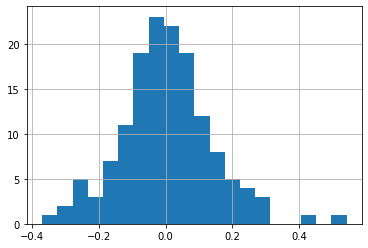

In [86]:
errors.hist(bins=20)

In [88]:
importance = pd.Series(np.abs(model1.coef_.ravel()))

In [92]:
importance.index = features["0"].tolist() + ["LotFrontage"]

In [93]:
importance.sort_values(inplace=True, ascending=False)

Text(0.5, 1.0, 'Feature Importance')

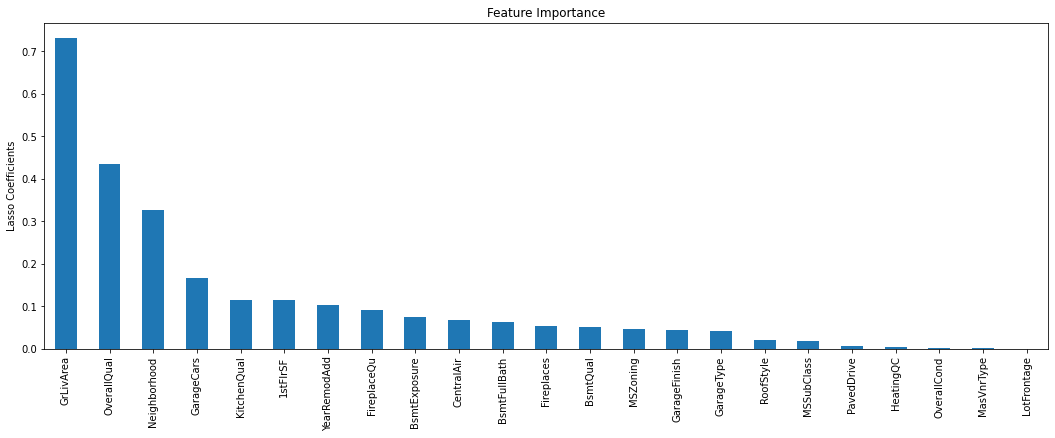

In [94]:
importance.plot.bar(figsize=(18,6))
plt.ylabel("Lasso Coefficients")
plt.title("Feature Importance")

In [107]:
model1 = Lasso(alpha=0.005, random_state=seed)
model2 = RandomForestRegressor(n_jobs=-1, random_state=seed)
model4 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5, random_state=seed),random_state=seed)
model5=VotingRegressor([('m1',model1), ('m2',model2), ('m4',model4)], n_jobs=-1)
model5.fit(X_train, Y_train)

VotingRegressor(estimators=[('m1',
                             Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=0, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('m2',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=N...
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0

In [108]:
pred5 = model5.predict(X_test)

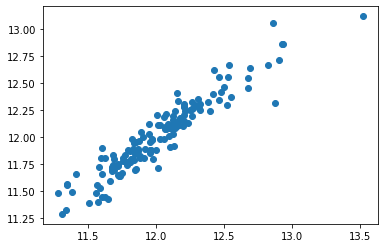

In [109]:
plt.scatter(Y_test, pred5)

In [110]:
mean_squared_error(np.exp(Y_test), np.exp(pred5))

1062146236.3915359

In [111]:
errors = Y_test - pred5

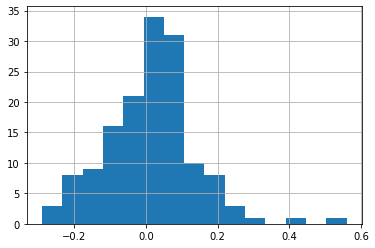

In [112]:
errors.hist(bins=15)